<a href="https://colab.research.google.com/github/KillerStrike17/Deep-Learning-for-Vision-Using-Tensorflow-Keras/blob/master/1.%20Kernels/Hello_Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

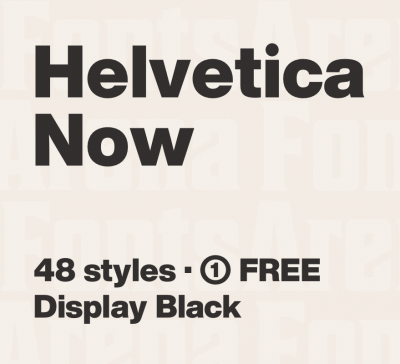

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)# display the downloaded image

In [0]:
edges = cv2.Canny(image,100,200) # Canny edge detector, inbuilt function to detect edges

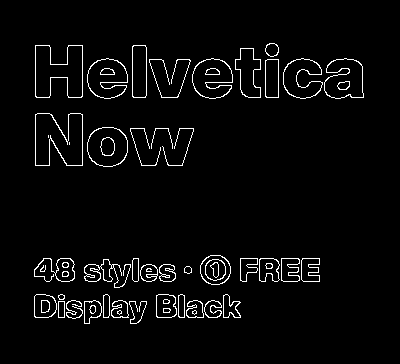

In [0]:
cv2_imshow(edges) #imshow function to display the image

We here consider that image as an array i.e. made up of rows and columns. 
Filter2D function combines image with kernal
Parameters are input image, ddepth, and input kernal
ddepth represents the depth of the image here -1 means it has the same
depth as the input image. 

Vertical Edge Detector kernel

To extract the vertical edges from the image, the middle column is kept 0. When the kernel will hover over horizonal line, all the values will nulify as central element will be zero, the left and right values will add to zero, hence the pixel value will be zero, hence horizontal lines will be discarded.

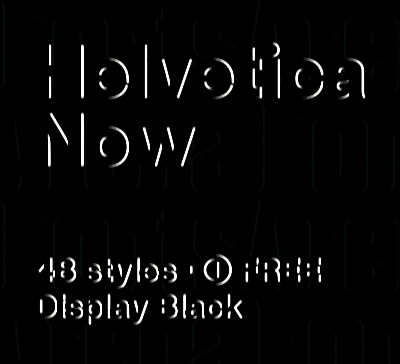

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Hortizontal Edge Detector

With the same logic of vertical edge detector, to only capture horizontal edges we have kepy middle row as 0, When the kernel will hover over vertical line, all the values will nulify as central element will be zero, the upper and lower values will add to zero, hence the pixel value will be zero, thus vertical lines will be discarded.


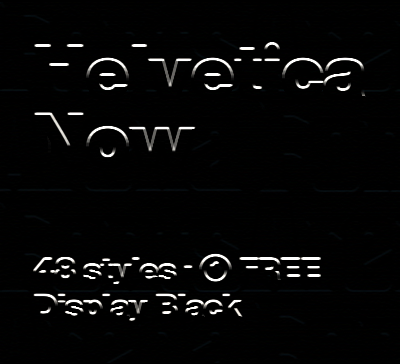

In [0]:
kernel = np.float32([[1,1,1],
                     [0,0,0],
                     [-1,-1,-1]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


45 degree angle detector

To have an exact 45 degree edge detector, we need to make sure that the line is exactly making 45 degrees. So there is a need to focus on the diagonals, now as we are using a 3x3 kernel with stride 1. So when the kernel reaches over an image where the pixels are forming a diagonal i.e. they are not horizonal and vertical edges, it displays the calculated value, else all the values calncel out and 0 is the output.

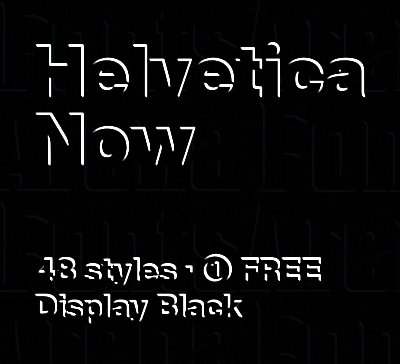

In [0]:
kernel = np.float32([[0,1,2],
                     [-1,0,1],
                     [-2,-1,0]])
dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Blur kernel

The bluring technique used here is called box blur, as we know that the output image will be the a multiplcation of the input image with the kernel followed with addition, so to normalize the image the average value of all the pixel is taken and final result is shown i.e. the kernel used is 3x3 so 9 pixels at a time will be processed, so an average of 9 input pixel values is done and the result is stored is dst variable and displayed using imshow function call.

Blur Image


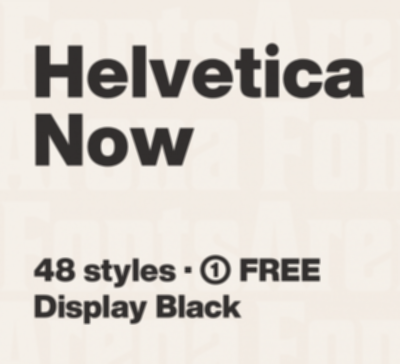

Original Image


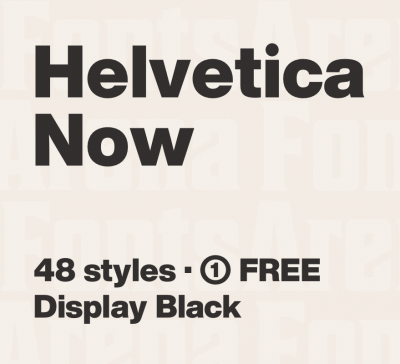

In [0]:
kernel = np.float32([[1/9,1/9,1/9],
                     [1/9,1/9,1/9],
                     [1/9,1/9,1/9]])
dst = cv2.filter2D(image,-1,kernel)
print ("Blur Image")
cv2_imshow(dst)
print ("Original Image")
cv2_imshow(image)

Sharpen Kernel

To sharpen the images the kernel used is [[0 -1 0][-1 5 -1][0 -1 0]], the reason of using these values is that to sharpen the image only adjacent pixels are required, so diagonals are kept to zero. the difference of the value between the center pixel and adjacent pixel is calculated and then the center pixel is added to maintain the color. thus in this way the 3x3 pixels get sharpened.



Sharpen Image


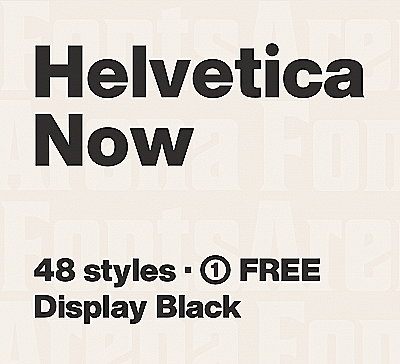

Original Image


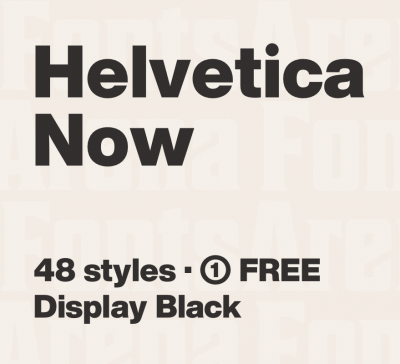

In [0]:
kernel = np.float32([[0,-1,0],
                     [-1,5,-1],
                     [0,-1,0]])
dst = cv2.filter2D(image,-1,kernel)
print ("Sharpen Image")
cv2_imshow(dst)
print ("Original Image")
cv2_imshow(image)

Identity function

To obtain the same image which was given as an input, the same input pixels values have to be stored. As the stride is 1, we hover over the image and keep the center pixel value intact. So when we process the whole image from top to bottom, all the center pixel values for every 3x3 input will be saved which is inturn the whole image as it is without any modifications.


Identity Image


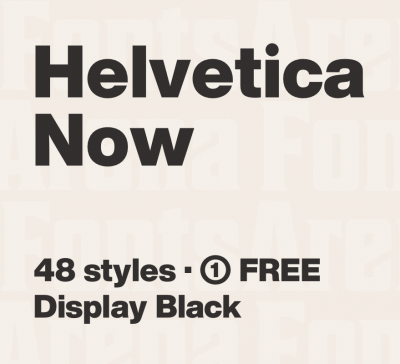

Original Image


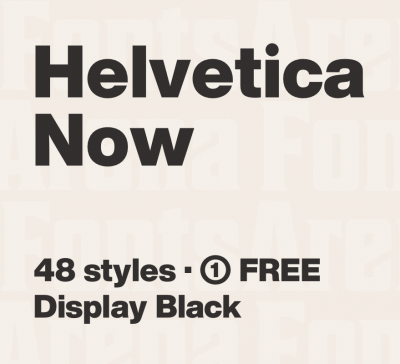

In [0]:
kernel = np.float32([[0,0,0],
                     [0,1,0],
                     [0,0,0]])
dst = cv2.filter2D(image,-1,kernel)
print ("Identity Image")
cv2_imshow(dst)
print ("Original Image")
cv2_imshow(image)